In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


transform_result = tansformer.trasnform(data)
transofrmer_result2 = f(transform_result)

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


view vs copy pandas 
https://stackoverflow.com/questions/23296282/what-rules-does-pandas-use-to-generate-a-view-vs-a-copy

In [3]:
# UCI(a) data repository
url = "http://bit.ly/wine-quality-lwd"
wine = pd.read_csv(url)


In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

C:\Users\Emil\AppData\Local\Temp\ipykernel_19920\435103059.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine["residual sugar"])
C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

<Axes: xlabel='residual sugar', ylabel='Density'>

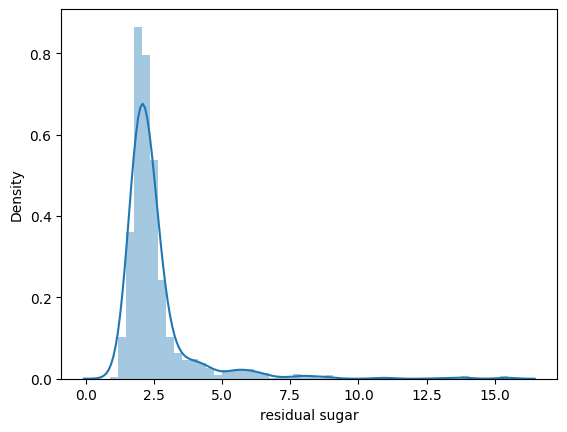

In [6]:
import seaborn as sns


sns.distplot(wine["residual sugar"])

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
wine.iloc[wine.sample(20).index, 3]

126     1.7
176     2.0
975     2.1
1590    1.8
131     2.3
976     2.1
408     3.7
839     2.2
1573    2.4
1298    1.4
352     2.4
434     3.2
901     2.4
862     2.7
993     2.0
209     2.1
617     2.2
367     2.6
612     2.4
595     7.9
Name: residual sugar, dtype: float64

In [10]:
wine.iloc[wine.sample(20).index, 3] = np.nan

In [11]:
wine.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar          20
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [12]:
X = wine.drop("quality", axis=1).copy()
y = wine["quality"].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state= 42
)

dealing with null value:

df.fillna(value) -> `df = df.fillna(0)`
imputing - > replace based on some statistics

In [13]:
imputer = SimpleImputer(strategy="median")
X_train_tr = imputer.fit_transform(X_train)



scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train_tr)


X_test_tr = imputer.transform(X_test)
X_test_tr = scale.transform(X_test_tr)

In [14]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor()



knn.fit(X_train_tr, y_train)


y_pred = knn.predict(X_test_tr)



mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [16]:
rmse

0.6748456613675949

#### Assume now we have splitted the data into training and test

In [17]:
# list all the steps here for building the model
from sklearn.pipeline import make_pipeline


# boru 
# pipeline 
pipe = make_pipeline(
    SimpleImputer(strategy="median"),
     StandardScaler(), 
     KNeighborsRegressor()

)

# apply all the transformation on the training set and train an knn model
pipe.fit(X_train, y_train)
# apply all the transformation on the test set and make predictions
y_pred = pipe.predict(X_test)
# measure the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [18]:
rmse

0.6748456613675949

### Simple and long pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

pipe_long = Pipeline([
    ("meadianimputer", SimpleImputer(strategy="median")),
    ("scaler",StandardScaler()),
    ("knn", KNeighborsRegressor())
])
# pipe_long.fit()

scaler1 = StandardScaler()
scaler2 = tandardScaler()

scaler1.fit_transform(X_train)

scaler1.fit_transform(X_test)

In [20]:
from sklearn.pipeline import make_pipeline
pipe_short = make_pipeline(SimpleImputer(strategy="median"), StandardScaler(), KNeighborsRegressor())

#long alternative
# pipe_short_alternative = Pipeline([('simpleimputer', SimpleImputer(strategy='median')),
#                ('standardscaler', StandardScaler()),
#                ('kneighborsregressor', KNeighborsRegressor())])
pipe_short

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [21]:
pipe_long

Pipeline(steps=[('meadianimputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

#### Make pipeline only takes objects without optional names

In [22]:
print(pipe_long.steps[0])
print(pipe_long.steps[1])
print(pipe_long[2])


('meadianimputer', SimpleImputer(strategy='median'))
('scaler', StandardScaler())
KNeighborsRegressor()


In [23]:
for stepp in pipe.steps:
    print(stepp)

('simpleimputer', SimpleImputer(strategy='median'))
('standardscaler', StandardScaler())
('kneighborsregressor', KNeighborsRegressor())


In [24]:
pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler(), KNeighborsRegressor()
)
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV #cross validation



# create a pipeline
pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler(), KNeighborsRegressor()
)

# list of parameter values to try. ATTENTION TO NAMING CONVENTION: WHY DOUBLE UNDERSCORE?
param_grid = {
    "kneighborsregressor__n_neighbors": [3, 5, 8, 12, 15],
    "kneighborsregressor__weights": ["uniform", "distance"],
}


# pipe_long = Pipeline([
#     ("meadianimputer", SimpleImputer(strategy="median")),
#     ("scaler",StandardScaler()),
#     ("knn", KNeighborsRegressor())
# ])

# param_grid_long = {
#     "knn__n_neighbors": [3, 5, 8, 12, 15],
#     "knn__weights": ["uniform", "distance"],
# }



grid = GridSearchCV(pipe, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [3, 5, 8, 12, 15],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='neg_mean_squared_error')

In [28]:
grid.best_params_

{'kneighborsregressor__n_neighbors': 15,
 'kneighborsregressor__weights': 'distance'}

In [29]:
mse = 15 # 15, 23, 45
max(-15, -23, -45)

-15

## More info about metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [30]:
# best score after grid search
print(np.sqrt(-grid.best_score_))


0.6208279864696451


In [31]:
grid.best_estimator_


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=15, weights='distance'))])

Calling `fit` on the pipeline is the same as calling `fit` on each estimator in turn, transform the input and pass it on to the next step. The pipeline has all the methods that the last estimator in the pipeline has, i.e. if the last estimator is a classifier, the Pipeline can be used as a classifier. If the last estimator is a transformer, again, so is the pipeline.

### Multiple models, multiple steps

In [32]:
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# pipeline for the model
pipe = Pipeline(
    [
        ("imputer", SimpleImputer()), # just give one of them
        ("scaler", MinMaxScaler()),
        ("regressor", KNeighborsRegressor()), # just give one of them
    ]
)

# model tunning with GridSearch. Look at double underscore between names
param_grid = {
    "imputer__strategy": ["mean", "median", "most_frequent", "constant"],
    "scaler": [StandardScaler(), MinMaxScaler(), "passthrough"], # passthrough means skip this step
    "regressor": [
        KNeighborsRegressor(),
        LinearRegression(),
        RandomForestRegressor(random_state=42),
        DecisionTreeRegressor(random_state=42),
        XGBRegressor(random_state=42),
    ],
}


grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent', 'constant'],
                         'regressor': [KNeighborsRegressor(),
                                       LinearRegression(),
                                       RandomForestRegressor(random_state=42),
                                       DecisionTreeRegressor(random_state=42),
                                       XGBRe...
                                                    max_cat_threshold=None,
                                                    max_cat_to_onehot=None,
                                                    max_delta_step=None,
                                                    max_depth=None,
                                                    max_leaves=None,
                                                    min_child_weight=None,
                                                    missing=nan,
                                                    monotone_constraints=None,
                                                    multi_strategy=None,
                                                    n_estimators=None,
                                                    n_jobs=None,
                                                    num_parallel_tree=None,
                                                    random_state=42, ...)],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    'passthrough']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
print(np.sqrt(-grid.best_score_))


print(grid.best_estimator_)
print(grid.best_estimator_.named_steps.imputer.strategy)


# store the result in pandas df for further analysis
result = pd.DataFrame(grid.cv_results_)

0.6087083268644403
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', 'passthrough'),
                ('regressor', RandomForestRegressor(random_state=42))])
most_frequent


In [35]:
result.head(1)

,0
mean_fit_time,0.012992
std_fit_time,0.002654
mean_score_time,0.016219
std_score_time,0.00498
param_imputer__strategy,mean
param_regressor,KNeighborsRegressor()
param_scaler,StandardScaler()
params,"{'imputer__strategy': 'mean', 'regressor': KNe..."
split0_test_score,-0.50375
split1_test_score,-0.509821


### Non numerical data

In [36]:
import pandas as pd
import numpy as np

# read the happiness data
url = "http://bit.ly/happiness-2019"
happiness = pd.read_csv(url)
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [37]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [38]:
# create a training and a test set
X = happiness.drop(["Overall rank", "Score"], axis=1).copy()
y = happiness["Score"].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [39]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# first select the numerical and categorical columns
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# pipeline for categorical data
cat_preprocessing = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

# pipeline for numerical data
num_preprocessing = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, num_cols), ("cat", cat_preprocessing, cat_cols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['GDP per capita', 'Social support',
                                  'Healthy life expectancy',
                                  'Freedom to make life choices', 'Generosity',
                                  'Perceptions of corruption']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Country or region'])])

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# make a new pipeline that does everything
full_pipe = Pipeline(
    [
        ("preprocess", preprocessing),
        ("regressor", RandomForestRegressor(random_state=42)),
    ]
)

# measure model performance using cross-validation
scores = cross_val_score(
    full_pipe, X_train, y_train, cv=5, scoring="neg_mean_squared_error",
)
# rmse
print(np.mean(np.sqrt(-scores)))

C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\

0.4799916219726474


In [41]:
scores.

array([-0.26751515, -0.33156611, -0.13676834, -0.20686789, -0.23258659])